### Import library

In [1]:
import numpy as np
import control as co
import matplotlib.pyplot as plt

### Stable system

In [2]:
s=co.tf('s')
forward=3/(s*(s+1)*(s+2))
forward

TransferFunction(array([3]), array([1., 3., 2., 0.]))

In [3]:
G=co.feedback(sys1=forward, sys2=1)
G

TransferFunction(array([3]), array([1., 3., 2., 3.]))

(array([-2.67169988+0.j        , -0.16415006+1.04686932j,
        -0.16415006-1.04686932j]),
 array([], dtype=float64))

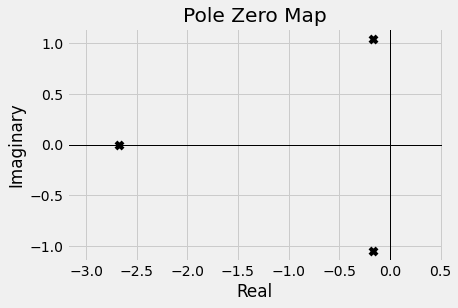

In [4]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

(0.0, 1.6428661788122507)

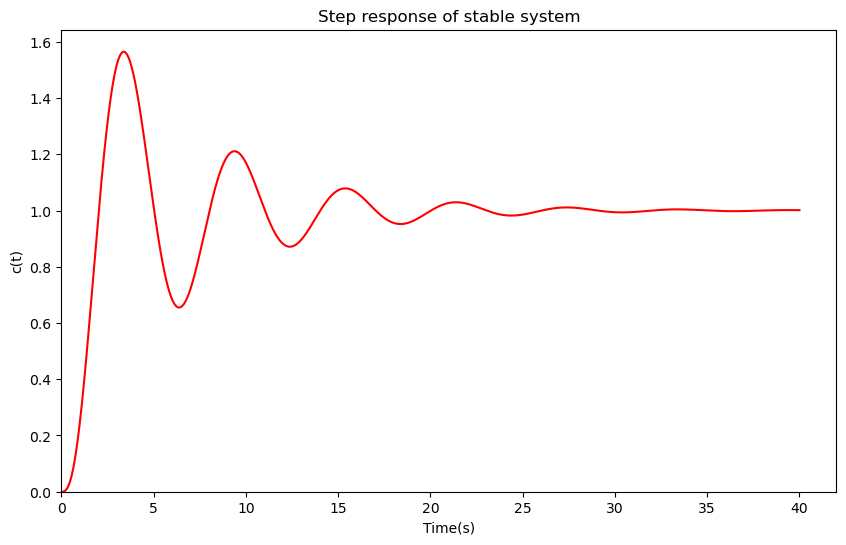

In [5]:
plt.style.use('default')

t=np.linspace(0, 40,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(10,6))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of stable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)
ax.set_ylim(0)

### Marginally stable system

In [6]:
G=3/((s+2)*(s+2j)*(s-2j))
G

TransferFunction(array([3]), array([1.+0.j, 2.+0.j, 4.+0.j, 8.+0.j]))

C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:987: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


(array([-2.00000000e+00+0.j,  2.49800181e-16+2.j,  2.49800181e-16-2.j]),
 array([], dtype=float64))

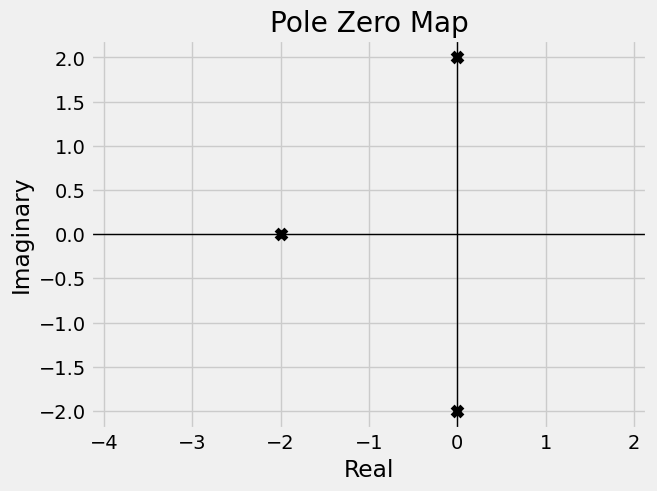

In [7]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

C:\Users\HP-NPC\anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


(0.0, 0.6721732911618324)

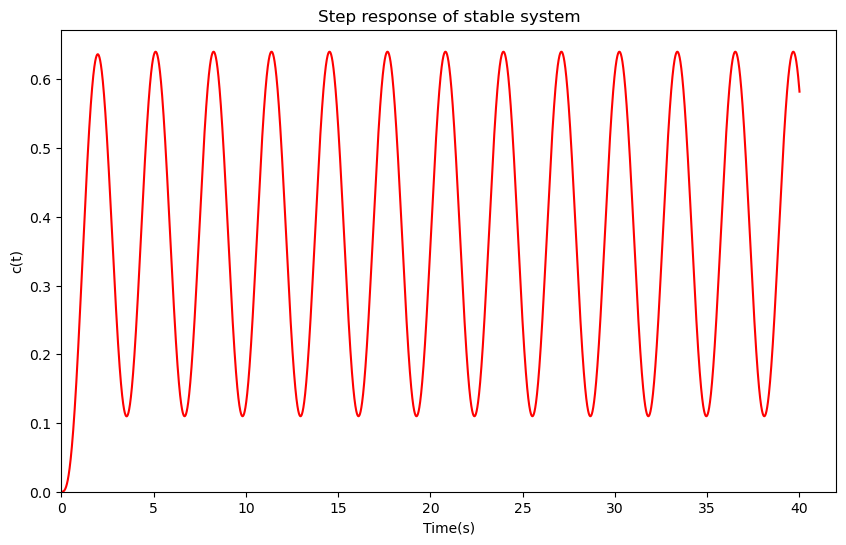

In [8]:
plt.style.use('default')

t=np.linspace(0, 40,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(10,6))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of stable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)
ax.set_ylim(0)

In [9]:
G=3/((s+2j)*(s-2j))
G

TransferFunction(array([3]), array([1.+0.j, 0.+0.j, 4.+0.j]))

C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:987: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


(array([2.77555756e-17+2.j, 2.77555756e-17-2.j]), array([], dtype=float64))

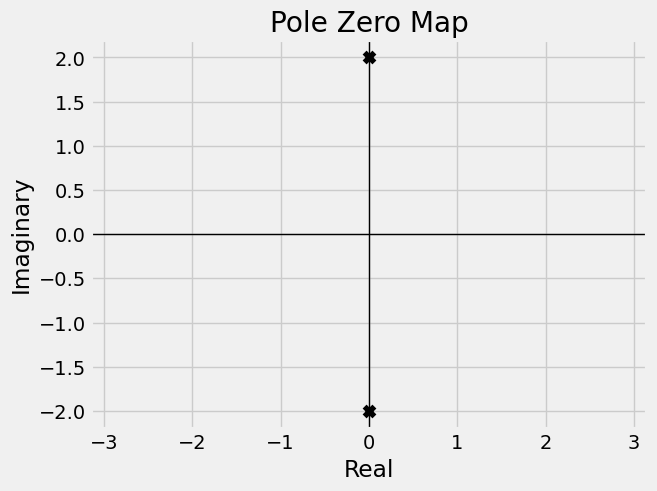

In [10]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

C:\Users\HP-NPC\anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


(0.0, 1.5749999893407267)

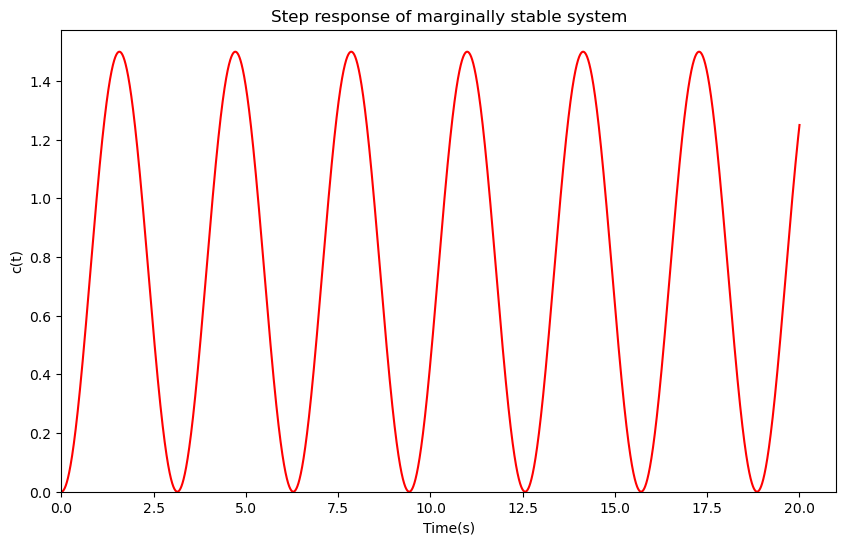

In [11]:
plt.style.use('default')

t=np.linspace(0, 20,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(10,6))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of marginally stable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)
ax.set_ylim(0)

### Unstable system

In [12]:
G=3/(s**3+3*s**2+2*s+7)
G

TransferFunction(array([3]), array([1., 3., 2., 7.]))

(array([-3.08674534+0.j        ,  0.04337267+1.50528389j,
         0.04337267-1.50528389j]),
 array([], dtype=float64))

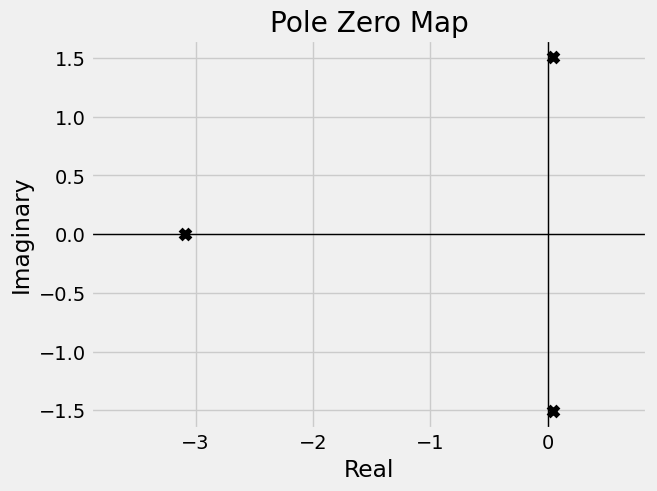

In [13]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

(0.0, 42.0)

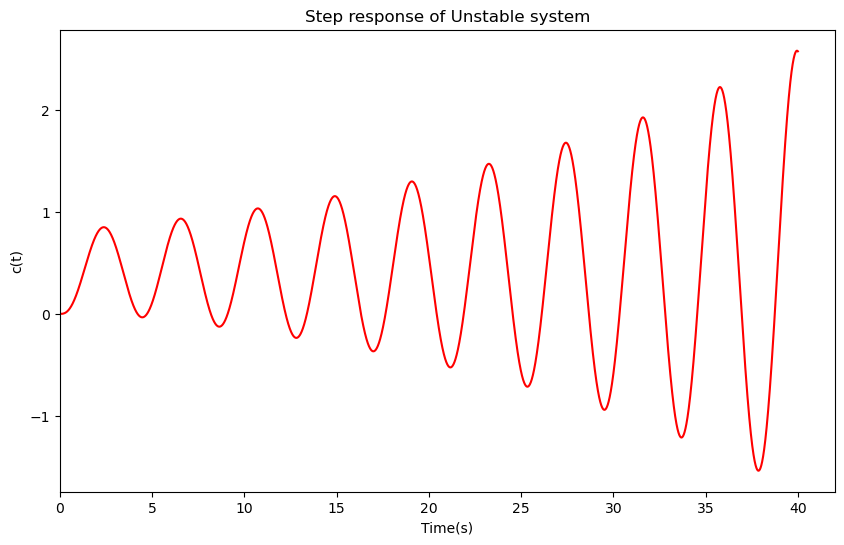

In [14]:
plt.style.use('default')

t=np.linspace(0, 40,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(10,6))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of Unstable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)

### Routh-Hurwitz Criterion

In [15]:
import sympy as sym
from tbcontrol.symbolic import routh

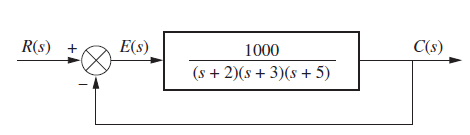

In [16]:
forward=1000/((s+2)*(s+3)*(s+5))
G=co.feedback(sys1=forward, sys2=1)
G

TransferFunction(array([1000]), array([1.00e+00, 1.00e+01, 3.10e+01, 1.03e+03]))

In [ ]:
s=sym.symbols('s')
denominator=s**3+10*s**2+31*s+1030
denominator

In [ ]:
denominator=sym.poly(denominator)
denominator

In [ ]:
routh(denominator)

<ol>
    <li>The number of roots of
the polynomial that are in the right half-plane is equal to the number of sign changes in
the first column.</li>
</ol>

### check

In [ ]:
s=co.tf('s')
denominator=s**3+10*s**2+31*s+1030
numerator=1000
G=numerator/denominator
plt.style.use('fivethirtyeight')
co.pzmap(G)

Make a Routh table and tell how many roots of the following polynomial
are in the right half-plane and in the left half-plane.
$$P(s)=3s^7 + 9s^6 + 6s^5 + 4s^4 + 7s^3 + 8s^2 + 2s + 6$$

In [ ]:
s=sym.symbols('s')
P=3*s**7 + 9*s**6 + 6*s**5 + 4*s**4 + 7*s**3 + 8*s**2 + 2*s+6
p=sym.poly(P)
p

In [ ]:
routh(p)

The number of sign changes in first column is 4 times.So there are 4 roots in right half plane

### Routh-Hurwitz Criterion: Special Cases
<ol>
    <li>
        The Routh table sometimes will have a zero only in the first
column of a row
    </li>
    <li>
        The Routh table sometimes will have an entire row that consists of
zeros.
    </li>
</ol>

#### Zero Only in the First Column
$$T(s)=\dfrac {10}{s^5+2s^4+3s^3+6s^2+5s+3}$$

In [ ]:
s=sym.symbols('s')
char_poly=s**5 + 2*s**4 + 3*s**3 + 6*s**2 + 5*s +3
char_poly=sym.poly(char_poly)
char_poly

In [ ]:
routh(char_poly)

Stability via Reverse Coeffificients

In [ ]:
char_poly=3*s**5 + 5*s**4 + 6*s**3 + 3*s**2 + 2*s +1
char_poly=sym.poly(char_poly)
char_poly

In [ ]:
routh(char_poly)

The number of sign changes in first column is 2 times.So there are 2 roots in right half plane

### Check

In [ ]:
s=co.tf('s')
denominator=s**5 + 2*s**4 + 3*s**3 + 6*s**2 + 5*s +3
numerator=10
G=numerator/denominator
co.pzmap(G)

#### Stability via Routh Table with Row of Zeros
$$T(s)=\dfrac {10}{s^5+7s^4+6s^3+42s^2+8s+56}$$

In [ ]:
s=sym.symbols('s')
char_poly=s**5 + 7*s**4 + 6*s**3 + 42*s**2 + 8*s + 56
char_poly=sym.poly(char_poly)
char_poly

In [ ]:
routh(char_poly)

We stop at the third row, since the entire row consists of zeros.
First we return to the row immediately above the row of zeros and form an auxiliary polynomial.$$P(s)=7s^4+42s^2+56$$
At the second row we multiply through by 1/7 for convenience
$$P(s)=s^4+6s^2+8$$

In [ ]:
P=sym.symbols('P', cls=sym.Function)
P=s**4 + 6*s**2 + 8
P

In [ ]:
sym.diff(P,s)

We can multiply through by 1/4 for convenience
$$\frac{d}{ds}P(s)=s^3+3s$$

In [ ]:
rh=np.array([[1,6,8],[1,6,8],[1,3,0]])
rh

In [ ]:
order=5    #order of equation
position=1 #immidiate above row position of zeros row
for i in range(position,order-1):
    j=2
    s2_0=np.linalg.det(rh[i:,:j])
    s2_1=np.linalg.det(rh[i:,::j])
    rh=np.vstack((rh, [-1*s2_0/rh[i+1,0], -1*s2_1/rh[i+1,0], 0]))
sym.Matrix(rh) #for better view we convert symbolic Matrix instead of numpy matrix

<p>An entire row of zeros will appear in the Routh table when a purely even
or purely odd polynomial is a factor of the original polynomial.</p>
<p>Even polynomials only have roots that are symmetrical about the
origin.
This symmetry can occur under three conditions of root position:
<ol><li>The roots are symmetrical and real</li> <li>The roots are symmetrical and
imaginary</li> <li>The roots are quadrantal</li></ol>
Since $jω$ roots are symmetric about the
origin, if we do not have a row of zeros, we cannot possibly have $jω$ roots.</p>
<p>Another characteristic of the Routh table for the case in question is
that the row previous to the row of zeros contains the even polynomial
that is a factor of the original polynomial. Finally, everything from the
row containing the even polynomial down to the end of the Routh table
is a test of only the even polynomial.</p>


### Check

In [ ]:
s=co.tf('s')
denominator=s**5 + 7*s**4 + 6*s**3 + 42*s**2 + 8*s + 56
numerator=10
G=numerator/denominator
plt.style.use('fivethirtyeight')
co.pzmap(G)

#### Pole Distribution via Routh Table with Row of Zeros
$$T(s)=\dfrac{20}{s^8+s^7+12s^6+22s^5+39s^4+59s^3+48s^2+38s^1+20}$$

In [ ]:
s=sym.symbols('s')
denominator=s**8+s**7+12*s**6+22*s**5+39*s**4+59*s**3+48*s**2+38*s**1+20
denominator=sym.poly(denominator)
denominator

In [ ]:
sym.solveset(s**8+s**7+12*s**6+22*s**5+39*s**4+59*s**3+48*s**2+38*s**1+20,s)

In [ ]:
routh(denominator)

We stop at the fifth row position, since the entire row consists of zeros. First we return to the row immediately above the row of zeros and form an auxiliary polynomial.
$$P(s)=10s^4+30s^2+40$$

In [ ]:
P=10*s**4+30*s**2+40
diffren=sym.diff(P,s)
diffren

So $$\frac{d}{ds}P(s)=40s^3+60s$$
Now we repalace the zeros row by [40, 60, 0, 0, 0] 

In [ ]:
rh=np.array([[1,12,39,48,20],
            [1,22,59,38,0],
            [-10,-20,10,20,0],
            [20,60,40,0,0],
            [10,30,20,0,0],
            [40,60,0,0,0]])
rh

In [ ]:
rh[4:,[0,2]]

In [ ]:
order=8    #order of equation
position=4 #immidiate above row position of zeros row
for i in range(position,order-1):
    j=2
    s_0=np.linalg.det(rh[i:,:j])
    s_1=np.linalg.det(rh[i:,[0,j]])
    rh=np.vstack((rh, [-1*s_0/rh[i+1,0], -1*s_1/rh[i+1,0], 0, 0, 0]))
sym.Matrix(rh) #for better view we convert symbolic Matrix instead of numpy matrix

Since all entries from the even
polynomial at the $s^4$ row down to the $s^0$ row are a test of the even polynomial,we begin
to draw some conclusions about the roots of the even polynomial.No sign changes exist
from the $s^4$ row down to the $s^0$ row. Thus, the even polynomial does not have right-halfplane
poles. Since there are no right-half-plane poles, no left-half-plane poles are present
because of the requirement for symmetry. Hence, the even polynomial$$P(s)=10s^4+30s^2+40$$ must
have all four of its poles on the $jω$-axis.
<p>The remaining roots of the total polynomial are evaluated from the $s^8$ row down to
the $s^4$ row. We notice two sign changes: one from the $s^7$ row to the $s^6$ row and the other
from the $s^6$ row to the $s^5$ row. Thus, the other polynomial must have two roots in the right
half-plane</p>

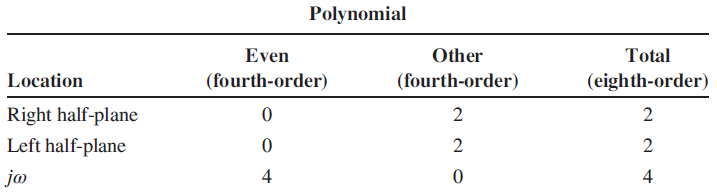

### Check

In [ ]:
s=co.tf('s')
plt.style.use('fivethirtyeight')
denominator=s**8+s**7+12*s**6+22*s**5+39*s**4+59*s**3+48*s**2+38*s**1+20
numerator=20
G=numerator/denominator
co.pzmap(G)

#### Stability Design via Routh-Hurwitz
Find the range of gain K, for the system of Figure bellow that will cause the
system to be stable, unstable, and marginally stable
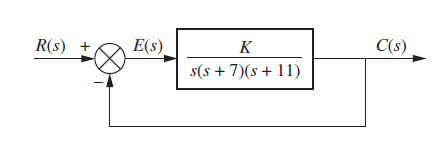

In [ ]:
s, k=sym.symbols('s k')
forward=k/(s*(s+7)*(s+1))
feedback=1
tf=forward/(1+forward*feedback)
tf=tf.simplify().expand()
tf

In [ ]:
denominator=s**3+8*s**2+7*s+k
denominator=sym.poly(denominator,s)
denominator

In [ ]:
rou_hur=routh(denominator)
rou_hur

For stability, the left hand column must have entries with all the same signs.

In [ ]:
rou_hur[:, 0]

In [ ]:
sym.solve([var>0 for var in rou_hur[:,0]], k)